   Jahr  Einkommen pro Person (Monat)
0  2024                       2509.97
1  2023                       2408.16
2  2022                       2253.12
3  2021                       2088.28
4  2020                       2028.37
5  2019                       2025.06
6  2018                       1976.71


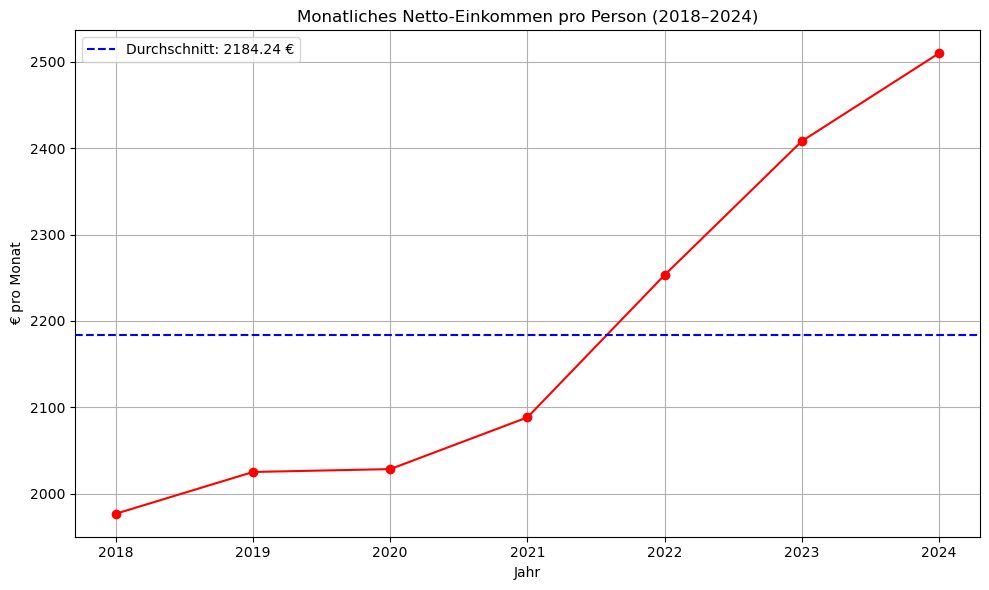

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Datei und Blattname
datei = "data/einkommen_bis_2024.xlsx"
blatt = "Daten"

# Excel-Tabelle lesen
# Excel laden, keine Kopfzeile
df = pd.read_excel(datei, sheet_name=blatt, header=None)

# Die Spalten mit den Daten sind Spalte 1 (Jahr) und Spalte 2 (Einkommen)
df = df.iloc[1:, [1, 2]]  # ab Zeile 1, Spalte 1 und 2
df.columns = ['Jahr', 'Einkommen (Mrd Euro)']

# Leerzeilen entfernen
df = df.dropna()
df = df.reset_index(drop=True)
df['Jahr'] = df['Jahr'].astype(int)
df = df[df['Jahr'] >= 2018]

# Einwohnerzahl Deutschland Mittelwert zwischen 2018-2024 (ca. 84 Millionen)
einwohner = 83_210_000  # Durchschnitt Einwohnerzahl 2018-2024

# Spalten in der Tabelle: Jahr und Einkommen in Milliarden Euro
# Beispiel: 'Jahr' und 'Einkommen (Mrd Euro)'
jahr_spalte = 'Jahr'
einkommen_spalte = 'Einkommen (Mrd Euro)'

# Für jedes Jahr Einkommen pro Person und Monat berechnen
df['Einkommen pro Person (Jahr)'] = (df['Einkommen (Mrd Euro)'] * 1_000_000_000) / einwohner
df['Einkommen pro Person (Monat)'] = df['Einkommen pro Person (Jahr)'] / 12
df['Einkommen pro Person (Monat)'] = df['Einkommen pro Person (Monat)'].round(2)

# Ergebnis anzeigen
print(df[[jahr_spalte, 'Einkommen pro Person (Monat)']])

# Ergebnis in neue Excel speichern
df.to_excel("tabellen/einkommen_mit_monat.xlsx", index=False)
df.to_csv('tabellen/einkommen_mit_monat.csv', index=False, sep=';')

# Durchschnitt berechnen
durchschnitt = df['Einkommen pro Person (Monat)'].mean()

# Liniendiagramm mit Punkten
plt.figure(figsize=(10, 6))
plt.plot(df['Jahr'], df['Einkommen pro Person (Monat)'], marker='o', linestyle='-', color='red')
plt.title('Monatliches Netto-Einkommen pro Person (2018–2024)')
plt.xlabel('Jahr')
plt.ylabel('€ pro Monat')
plt.grid(True)
plt.tight_layout()


# Durchschnittslinie hinzufügen
plt.axhline(durchschnitt, color='blue', linestyle='--', label=f'Durchschnitt: {durchschnitt:.2f} €')

# Legende anzeigen
plt.legend()

# Speichern
plt.savefig("bilder/verfuegbares_einkommen_2018-2024.png")

# Anzeigen
plt.show()
